## vcGRAPPA reconstruction 
###### Author: Zimu Huo
###### Date: 05.2022


-------------------------------------------------------------------------
References
    
    [1] 
    Author: Mark A. Griswold et al. 
    Title: Virtual Coil Concept for Improved Parallel MRIEmploying Conjugate Symmetric Signals
    Link: https://onlinelibrary.wiley.com/doi/epdf/10.1002/mrm.21652
    

In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
from util.fft import *
import util.simulator as simulate
import util.phantom as phantom
from util.vc_grappa import * 
from util.twix import *

In [2]:
indSlice = np.asarray([2], dtype = int)
numSlice = len(indSlice)
R = 4
file_sms = "../lib/meas_MID00134_FID55501_catesain_4slices.dat"
file = readtwix(file_sms)

Software version: VD/VE (!?)

Scan  0
100 % parsed in 1 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 1 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/1063 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/4 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary.
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   DATA


In [3]:
data = file[0]['readouts'][...,0]
data = data[...,::4]
acs = simulate.acs(data, (32, 32))
dataR = data[::R]

In [4]:
calib = simulate.acs(data,(32,32))
kspace = dataR

In [5]:
recon2 = grappa(kspace, calib, R)

In [6]:
recon = vc_grappa(kspace, calib, R)

TypeError: bad operand type for abs(): 'NoneType'

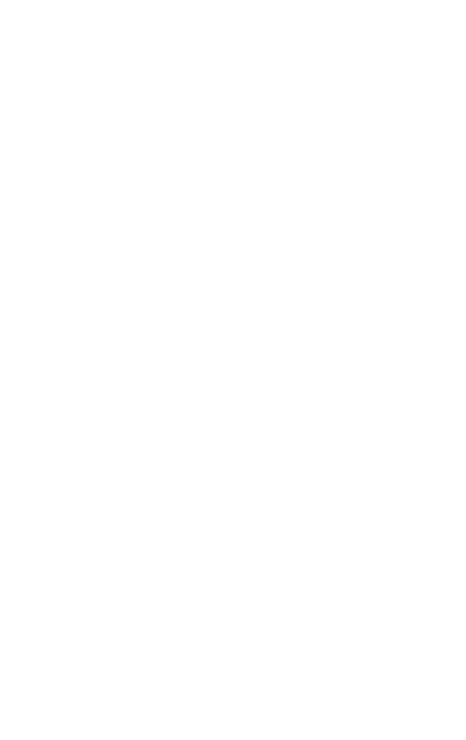

In [7]:
plt.figure(figsize=(16, 12), dpi=80)
plt.subplot(121)
plt.axis('off')
plt.imshow(np.abs(rsos(recon2)),cmap='gray')
plt.title("GRAPPA")
plt.subplot(122)
plt.axis('off')
plt.imshow(np.abs(rsos(recon)),cmap='gray')
plt.title("vcGRAPPA")
plt.savefig("vcgrappa.png")
plt.show()